<a href="https://colab.research.google.com/github/anagarciasaiz/peliculas/blob/main/peliculitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from math import floor, ceil

In [47]:
datos = {
    "Opinion":[5,4,3,2,1,0],
    "Cantidad de Votantes":[42,96,132,124,88,58]
}

In [48]:
df = pd.DataFrame(datos)

In [49]:
print(df)

   Opinion  Cantidad de Votantes
0        5                    42
1        4                    96
2        3                   132
3        2                   124
4        1                    88
5        0                    58


In [50]:
#Cambiamos la columna "Cantidad de Votantes" 
df["Cantidad de Votantes"] = [40, 99, 145, 133, 96, 40]

In [51]:
print(df)

   Opinion  Cantidad de Votantes
0        5                    40
1        4                    99
2        3                   145
3        2                   133
4        1                    96
5        0                    40


In [52]:
df['Productos (Ni x Xi)'] = df['Opinion'] * df['Cantidad de Votantes']

In [53]:
print(df)

   Opinion  Cantidad de Votantes  Productos (Ni x Xi)
0        5                    40                  200
1        4                    99                  396
2        3                   145                  435
3        2                   133                  266
4        1                    96                   96
5        0                    40                    0


In [67]:
x=df["Productos (Ni x Xi)"].sum()
observaciones=df["Cantidad de Votantes"].sum()
media=x/observaciones
print(media)

2.518987341772152


In [65]:
df["Ni*(Xi-media)^2"] = df["Cantidad de Votantes"] * ((df["Opinion"] - media)*(df["Opinion"] - media))

In [66]:
print(df)

   Opinion  Cantidad de Votantes  Productos (Ni x Xi)  Ni*(Xi-media)^2
0        5                    40                  200       246.216952
1        4                    99                  396       217.146451
2        3                   145                  435        33.549111
3        2                   133                  266        35.823266
4        1                    96                   96       221.502964
5        0                    40                    0       253.811889


In [70]:
varianza=df["Ni*(Xi-media)^2"].sum()/observaciones
print(varianza)
desviacion_tipica=math.sqrt(varianza)
print(desviacion_tipica)

1.8228763705450137
1.3501393893020874


In [88]:

intervalo_68 = (max(floor(media - desviacion_tipica),0),min(ceil( media + desviacion_tipica),5))
intervalo_95 = (max(floor(media - 2 * desviacion_tipica),0),min(ceil( media + 2 * desviacion_tipica),5))
intervalo_997 = (max(floor(media - 3 * desviacion_tipica),0),min(ceil( media + 3 * desviacion_tipica),5))



print(intervalo_68)
print(intervalo_95)
print(intervalo_997)


(1, 4)
(0, 5)
(0, 5)


In [89]:
observaciones_intervalo_68 = df[(df['Opinion'] >= intervalo_68[0]) & (df['Opinion'] <= intervalo_68[1])]
observaciones_intervalo_95 = df[(df['Opinion'] >= intervalo_95[0]) & (df['Opinion'] <= intervalo_95[1])]
observaciones_intervalo_997 = df[(df['Opinion'] >= intervalo_997[0]) & (df['Opinion'] <= intervalo_997[1])]


In [90]:
porcentaje_intervalo_68 = observaciones_intervalo_68['Cantidad de Votantes'].sum() / observaciones * 100
porcentaje_intervalo_95 = observaciones_intervalo_95['Cantidad de Votantes'].sum() / observaciones * 100
porcentaje_intervalo_997 = observaciones_intervalo_997['Cantidad de Votantes'].sum() / observaciones * 100
print(porcentaje_intervalo_68)
print(porcentaje_intervalo_95)
print(porcentaje_intervalo_997)

85.53345388788426
100.0
100.0


en el intervalo [1,4] se encuentran 85,533% de las observaciones

en el intervalo [0, 5] se encuentran el 100% de las observaciones

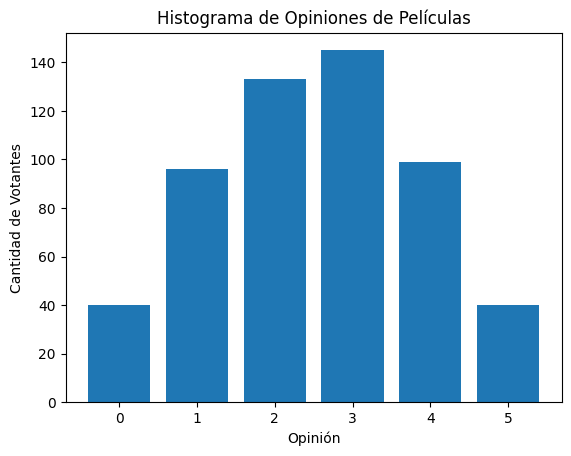

In [101]:
opiniones = df['Opinion']
votantes = df['Cantidad de Votantes']


plt.bar(opiniones, votantes)



plt.title("Histograma de Opiniones de Películas")
plt.xlabel("Opinión")
plt.ylabel("Cantidad de Votantes")


plt.show()

